In [3]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv('CombinedData.csv')
#change csv to huge csv file with all data
# i got this data from the yearly file
df.head()

,Unnamed: 0,Player,Tm,Pos,Age,G,GS,Cmp,Att,Yds,...,FumblesLost,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints
0,0,Christian McCaffrey,CAR,RB,23,16,16,0,2,0,...,0,0,0,2,1387,15,287,1005,4,469.20
1,1,Lamar Jackson,BAL,QB,22,15,15,265,401,3127,...,2,3127,36,401,1206,7,176,0,0,415.68
2,2,Derrick Henry,TEN,RB,25,15,15,0,0,0,...,3,0,0,0,1540,16,303,206,2,294.60
3,3,Aaron Jones,GNB,RB,25,16,16,0,0,0,...,2,0,0,0,1084,16,236,474,3,314.80
4,4,Ezekiel Elliott,DAL,RB,24,16,16,0,0,0,...,2,0,0,0,1357,12,301,420,2,311.70


In [5]:
df.shape

(2981, 28)

In [7]:
df.dtypes

Unnamed: 0         int64
Player            object
Tm                object
Pos               object
Age                int64
G                  int64
GS                 int64
Cmp                int64
Att                int64
Yds                int64
Int                int64
Att.1              int64
Yds.1              int64
Tgt                int64
Rec                int64
Yds.2              int64
Y/R              float64
Fumbles            int64
FumblesLost        int64
PassingYds         int64
PassingTD          int64
PassingAtt         int64
RushingYds         int64
RushingTD          int64
RushingAtt         int64
ReceivingYds       int64
ReceivingTD        int64
FantasyPoints    float64
dtype: object

In [9]:
df.isnull().sum()

Unnamed: 0       0
Player           0
Tm               0
Pos              0
Age              0
G                0
GS               0
Cmp              0
Att              0
Yds              0
Int              0
Att.1            0
Yds.1            0
Tgt              0
Rec              0
Yds.2            0
Y/R              0
Fumbles          0
FumblesLost      0
PassingYds       0
PassingTD        0
PassingAtt       0
RushingYds       0
RushingTD        0
RushingAtt       0
ReceivingYds     0
ReceivingTD      0
FantasyPoints    0
dtype: int64

In [10]:
X   = df[['G', 'GS', 'Cmp', 'Att',
       'Yds', 'Int', 'Att.1', 'Yds.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'Fumbles',
       'FumblesLost', 'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds',
       'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD']] #get the input features
y   = df['FantasyPoints']              #get the target

X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3)  #set aside 30% of the data as the test set #reproduce the results

In [11]:
# Linear Regression
model = LinearRegression().fit(X_train, y_train)
#model intercept
print(model.intercept_)
# model slope
print(model.coef_)

# R^2 value
model_train_score = model.score(X_train, y_train)
model_test_score = model.score(X_test, y_test)

print("Model train score:", model.score(X_train, y_train))
print("Model test score:", model.score(X_test, y_test))

-1.1368683772161603e-13
[ 2.21063924e-14 -1.75970349e-14  5.73759790e-15 -1.67294288e-02
 -3.11807163e-03 -2.00000000e+00  6.80686630e-03 -7.42314766e-02
 -4.64905892e-16  1.00000000e+00  9.67482325e-02  9.76432477e-16
  2.03038541e-15 -2.00000000e+00  4.31180716e-02  4.00000000e+00
  1.67294288e-02  1.74231477e-01  6.00000000e+00 -6.80686630e-03
  3.25176747e-03  6.00000000e+00]
Model train score: 1.0
Model test score: 1.0


In [12]:
# Random forest
model = RandomForestRegressor(random_state=0).fit(X_train, y_train)
print("Model train score:", model.score(X_train, y_train))
print("Model test score:", model.score(X_test, y_test))


Model train score: 0.9979532456016363
Model test score: 0.9875451900761074


Feature: 0, Score: 0.00061
Feature: 1, Score: 0.57495
Feature: 2, Score: 0.00232
Feature: 3, Score: 0.00159
Feature: 4, Score: 0.00550
Feature: 5, Score: 0.00061
Feature: 6, Score: 0.02032
Feature: 7, Score: 0.02869
Feature: 8, Score: 0.01109
Feature: 9, Score: 0.17936
Feature: 10, Score: 0.03763
Feature: 11, Score: 0.00127
Feature: 12, Score: 0.00358
Feature: 13, Score: 0.00075
Feature: 14, Score: 0.00632
Feature: 15, Score: 0.01948
Feature: 16, Score: 0.00147
Feature: 17, Score: 0.02815
Feature: 18, Score: 0.00813
Feature: 19, Score: 0.02651
Feature: 20, Score: 0.03685
Feature: 21, Score: 0.00482


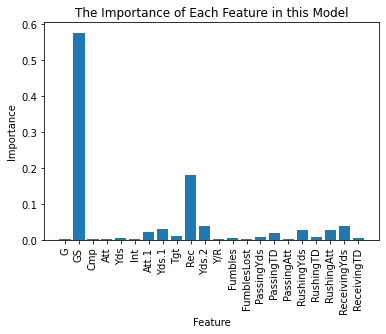

In [15]:
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
feat_labels = ['G', 'GS', 'Cmp', 'Att',
       'Yds', 'Int', 'Att.1', 'Yds.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'Fumbles',
       'FumblesLost', 'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds',
       'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD']
plt.xticks([x for x in range(len(importance))], feat_labels, rotation='vertical')
plt.title('The Importance of Each Feature in this Model')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [ ]:
# Support vector machine